## 4-1 Selenium 사용하기

In [1]:
from selenium import webdriver

In [2]:
driver = webdriver.Chrome('C:/Users/jeong/Documents/JUPYTER NOTEBOOK/selenium_driver/chromedriver')
driver.implicitly_wait(3)

In [3]:
driver.get('https://naver.com')

In [4]:
driver.save_screenshot('C:/Users/jeong/Documents/JUPYTER NOTEBOOK/selenium_images/001.png')

False

In [5]:
xpath = '//*[@id="account"]/div/a'
driver.find_element_by_xpath(xpath).click()

In [6]:
elem_login = driver.find_element_by_id('id')
elem_login.clear()
elem_login.send_keys('berryjane')

elem_login = driver.find_element_by_id('pw')
elem_login.clear()
elem_login.send_keys('madie_wjdals0525')

In [7]:
xpath = '//*[@id="frmNIDLogin"]/fieldset/input'
driver.find_element_by_xpath(xpath).click()

In [8]:
driver.get('http://mail.naver.com')

In [9]:
from bs4 import BeautifulSoup

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [10]:
raw_list = soup.find_all('div', 'name _ccr(lst.from) ')
raw_list[:5]

[]

In [11]:
send_list = [raw_list[n].find('a').get_text() for n in range(0, len(raw_list))]
send_list[:5]

[]

In [12]:
driver.close()

## 4-2 서울시 구별 주유소 가격 정보 얻기

In [13]:
driver = webdriver.Chrome('C:/Users/jeong/Documents/JUPYTER NOTEBOOK/selenium_driver/chromedriver.exe')
driver.get('http://www.opinet.co.kr/searRgSelect.do')

In [14]:
xpath = '//*[@id="SIGUNGU_NM0"]'
gu_list_raw = driver.find_element_by_xpath(xpath)
gu_list = gu_list_raw.find_elements_by_tag_name('option')

- `Selenium`에서는 단수와 복수 구분해야함!!

In [15]:
gu_names = [option.get_attribute('value') for option in gu_list]
gu_names.remove('')
gu_names[:5]

['강남구', '강동구', '강북구', '강서구', '관악구']

In [16]:
xpath = '//*[@id="searRgSelect"]'
driver.find_element_by_xpath(xpath).click()

In [17]:
xpath = '//*[@id="glopopd_excel"]'
driver.find_element_by_xpath(xpath).click()

In [18]:
element = driver.find_element_by_id("SIGUNGU_NM0")

In [19]:
element.send_keys(gu_names[0])

In [20]:
import time
from tqdm import tqdm_notebook

for gu in tqdm_notebook(gu_names) :
    element = driver.find_element_by_id("SIGUNGU_NM0")
    element.send_keys(gu)
    time.sleep(2)
    
    xpath = '//*[@id="searRgSelect"]'
    driver.find_element_by_xpath(xpath).click()
    time.sleep(1)
    
    xpath = '//*[@id="glopopd_excel"]'
    driver.find_element_by_xpath(xpath).click()
    time.sleep(1)

In [21]:
driver.close()

## 4-3 구별 주유 가격에 대한 데이터의 정리

In [22]:
import pandas as pd
from glob import glob

In [26]:
glob('C:/Users/jeong/Documents/JUPYTER NOTEBOOK/04_oil_data/지역*.xls')

['C:/Users/jeong/Documents/JUPYTER NOTEBOOK/04_oil_data\\지역_위치별(주유소) (1).xls',
 'C:/Users/jeong/Documents/JUPYTER NOTEBOOK/04_oil_data\\지역_위치별(주유소) (10).xls',
 'C:/Users/jeong/Documents/JUPYTER NOTEBOOK/04_oil_data\\지역_위치별(주유소) (11).xls',
 'C:/Users/jeong/Documents/JUPYTER NOTEBOOK/04_oil_data\\지역_위치별(주유소) (12).xls',
 'C:/Users/jeong/Documents/JUPYTER NOTEBOOK/04_oil_data\\지역_위치별(주유소) (13).xls',
 'C:/Users/jeong/Documents/JUPYTER NOTEBOOK/04_oil_data\\지역_위치별(주유소) (14).xls',
 'C:/Users/jeong/Documents/JUPYTER NOTEBOOK/04_oil_data\\지역_위치별(주유소) (15).xls',
 'C:/Users/jeong/Documents/JUPYTER NOTEBOOK/04_oil_data\\지역_위치별(주유소) (16).xls',
 'C:/Users/jeong/Documents/JUPYTER NOTEBOOK/04_oil_data\\지역_위치별(주유소) (17).xls',
 'C:/Users/jeong/Documents/JUPYTER NOTEBOOK/04_oil_data\\지역_위치별(주유소) (18).xls',
 'C:/Users/jeong/Documents/JUPYTER NOTEBOOK/04_oil_data\\지역_위치별(주유소) (19).xls',
 'C:/Users/jeong/Documents/JUPYTER NOTEBOOK/04_oil_data\\지역_위치별(주유소) (2).xls',
 'C:/Users/jeong/Documents/JUPYTER NOTEBOO

- **`glob()`** : `지역`으로 시작하는 xls파일 전체

In [30]:
stations_files = glob('C:/Users/jeong/Documents/JUPYTER NOTEBOOK/04_oil_data/지역*.xls')
stations_files[:5]

['C:/Users/jeong/Documents/JUPYTER NOTEBOOK/04_oil_data\\지역_위치별(주유소) (1).xls',
 'C:/Users/jeong/Documents/JUPYTER NOTEBOOK/04_oil_data\\지역_위치별(주유소) (10).xls',
 'C:/Users/jeong/Documents/JUPYTER NOTEBOOK/04_oil_data\\지역_위치별(주유소) (11).xls',
 'C:/Users/jeong/Documents/JUPYTER NOTEBOOK/04_oil_data\\지역_위치별(주유소) (12).xls',
 'C:/Users/jeong/Documents/JUPYTER NOTEBOOK/04_oil_data\\지역_위치별(주유소) (13).xls']

In [31]:
tmp_raw = []

for file_name in stations_files :
    tmp = pd.read_excel(file_name, header = 2)
    tmp_raw.append(tmp)

station_raw = pd.concat(tmp_raw)

In [32]:
station_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,(주)보성 세곡주유소,서울특별시 강남구 헌릉로 731 (세곡동),SK에너지,02-445-6870,Y,-,1359,1259,-
1,서울특별시,(주)정원이디에쓰 산성주유소,서울 강남구 헌릉로 730 (세곡동),GS칼텍스,02-2226-4963,Y,-,1359,1279,-
2,서울특별시,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),현대오일뱅크,02-529-5101,Y,1583,1383,1286,-
3,서울특별시,현대오일뱅크(주) 유진주유소,서울 강남구 논현로 152 (도곡동),현대오일뱅크,02-3462-5215,N,1598,1398,1298,1100
4,서울특별시,방죽주유소,서울특별시 강남구 밤고개로 215 (율현동),S-OIL,02-459-3434,Y,-,1419,1309,-


In [33]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508 entries, 0 to 14
Data columns (total 10 columns):
지역       508 non-null object
상호       508 non-null object
주소       508 non-null object
상표       508 non-null object
전화번호     508 non-null object
셀프여부     508 non-null object
고급휘발유    508 non-null object
휘발유      508 non-null object
경유       508 non-null object
실내등유     508 non-null object
dtypes: object(10)
memory usage: 43.7+ KB


In [34]:
stations = pd.DataFrame({'Oil_store' : station_raw['상호'],
                         '주소' : station_raw['주소'],
                         '가격' : station_raw['휘발유'],
                         '셀프' : station_raw['셀프여부'],
                         '상표' : station_raw['상표']})
stations.head()

,Oil_store,주소,가격,셀프,상표
0,(주)보성 세곡주유소,서울특별시 강남구 헌릉로 731 (세곡동),1359,Y,SK에너지
1,(주)정원이디에쓰 산성주유소,서울 강남구 헌릉로 730 (세곡동),1359,Y,GS칼텍스
2,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),1383,Y,현대오일뱅크
3,현대오일뱅크(주) 유진주유소,서울 강남구 논현로 152 (도곡동),1398,N,현대오일뱅크
4,방죽주유소,서울특별시 강남구 밤고개로 215 (율현동),1419,Y,S-OIL


In [35]:
stations['구'] = [eachAddress.split()[1] for eachAddress in stations['주소']]
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,(주)보성 세곡주유소,서울특별시 강남구 헌릉로 731 (세곡동),1359,Y,SK에너지,강남구
1,(주)정원이디에쓰 산성주유소,서울 강남구 헌릉로 730 (세곡동),1359,Y,GS칼텍스,강남구
2,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),1383,Y,현대오일뱅크,강남구
3,현대오일뱅크(주) 유진주유소,서울 강남구 논현로 152 (도곡동),1398,N,현대오일뱅크,강남구
4,방죽주유소,서울특별시 강남구 밤고개로 215 (율현동),1419,Y,S-OIL,강남구


In [36]:
stations['구'].unique()

array(['강남구', '도봉구', '특별시', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구',
       '성북구', '송파구', '양천구', '강동구', '영등포구', '용산구', '은평구', '종로구', '중구',
       '중랑구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구'],
      dtype=object)

- `특별시` : 제거해야함!

In [37]:
stations[stations['구'] == '특별시']

,Oil_store,주소,가격,셀프,상표,구
7,서현주유소,서울 특별시 도봉구 방학로 142 (방학동),1349,Y,S-OIL,특별시


In [38]:
stations.loc[stations['구'] == '특별시', '구'] = '도봉구'

In [39]:
stations['구'].unique()

array(['강남구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구',
       '송파구', '양천구', '강동구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구',
       '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구'], dtype=object)

In [40]:
stations[stations['가격'] == '-']

,Oil_store,주소,가격,셀프,상표,구
40,삼성주유소,서울 강남구 삼성로 521 (삼성동),-,N,SK에너지,강남구
41,동우주유소,서울특별시 강남구 봉은사로 311 (논현동),-,N,SK에너지,강남구
11,망원동주유소,서울 마포구 월드컵로 119 (망원동),-,N,SK에너지,마포구
12,(주)승지 염리동주유소,서울 마포구 백범로 126 (염리동),-,N,현대오일뱅크,마포구
13,서강주유소,서울 마포구 독막로 134 (창전동),-,N,SK에너지,마포구
22,KR누리(주) 종암주유소,서울 성북구 종암로 145 (종암동),-,N,SK에너지,성북구
24,현대주유소,서울 양천구 남부순환로 372 (신월동),-,Y,S-OIL,양천구
17,대성산업(주)대성주유소,서울 은평구 통일로 642 (녹번동),-,N,GS칼텍스,은평구


- `가격`이 입력되지 않은 행은 제거!

In [41]:
stations = stations[stations['가격'] != '-']
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,(주)보성 세곡주유소,서울특별시 강남구 헌릉로 731 (세곡동),1359,Y,SK에너지,강남구
1,(주)정원이디에쓰 산성주유소,서울 강남구 헌릉로 730 (세곡동),1359,Y,GS칼텍스,강남구
2,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),1383,Y,현대오일뱅크,강남구
3,현대오일뱅크(주) 유진주유소,서울 강남구 논현로 152 (도곡동),1398,N,현대오일뱅크,강남구
4,방죽주유소,서울특별시 강남구 밤고개로 215 (율현동),1419,Y,S-OIL,강남구


In [42]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 14
Data columns (total 6 columns):
Oil_store    500 non-null object
주소           500 non-null object
가격           500 non-null object
셀프           500 non-null object
상표           500 non-null object
구            500 non-null object
dtypes: object(6)
memory usage: 27.3+ KB


- 아직 `가격`정보는 숫자형데이터가 아님

In [43]:
stations['가격'] = [float(value) for value in stations['가격']]
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,(주)보성 세곡주유소,서울특별시 강남구 헌릉로 731 (세곡동),1359.0,Y,SK에너지,강남구
1,(주)정원이디에쓰 산성주유소,서울 강남구 헌릉로 730 (세곡동),1359.0,Y,GS칼텍스,강남구
2,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),1383.0,Y,현대오일뱅크,강남구
3,현대오일뱅크(주) 유진주유소,서울 강남구 논현로 152 (도곡동),1398.0,N,현대오일뱅크,강남구
4,방죽주유소,서울특별시 강남구 밤고개로 215 (율현동),1419.0,Y,S-OIL,강남구


In [44]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 14
Data columns (total 6 columns):
Oil_store    500 non-null object
주소           500 non-null object
가격           500 non-null float64
셀프           500 non-null object
상표           500 non-null object
구            500 non-null object
dtypes: float64(1), object(5)
memory usage: 27.3+ KB


- `가격`이 숫자형으로 변경!!

In [45]:
stations.reset_index(inplace = True)
del stations['index']

- 25개의 엑셀파일을 합쳤기 때문에 index가 중복되었을 수 있음!
    - `reset_index()`를 통해 인텍스를 처음부터 다시 기록하도록 한다.

## 4-4 셀프 주유소는 정말 저렴한지 boxplot으로 확인하기

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import platform

path = 'C:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc
if platform.system() == 'Darwin' :
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows' :
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else :
    print('Unknown system... sorry')

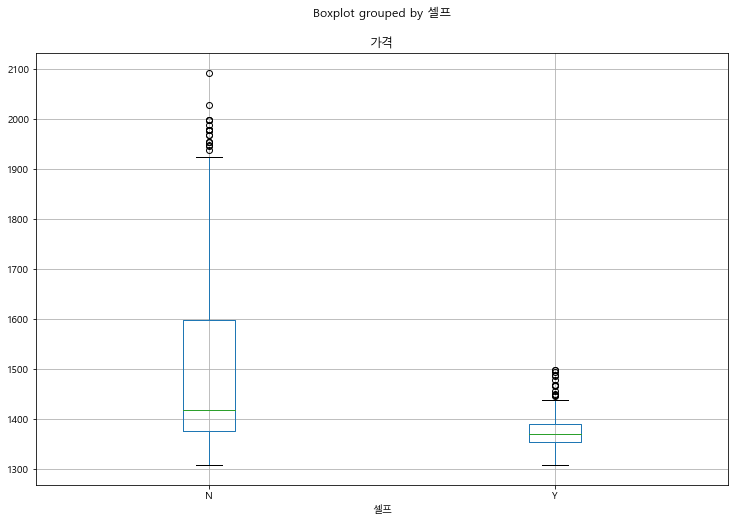

In [47]:
stations.boxplot(column = '가격', by = '셀프', figsize=(12,8))
plt.show()

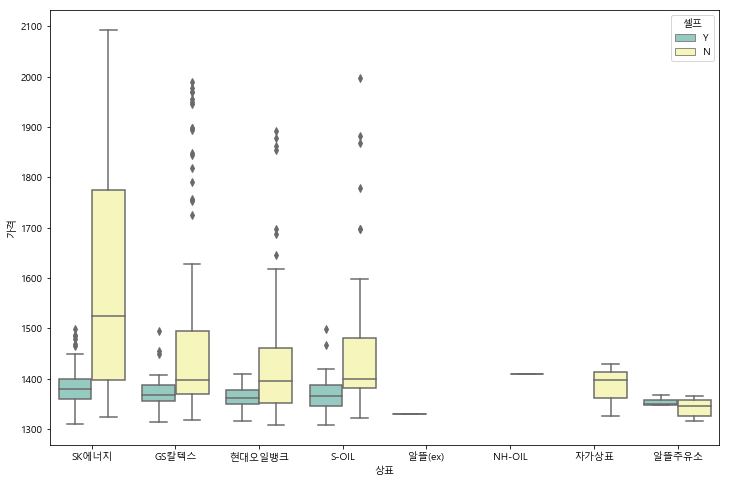

In [48]:
plt.figure(figsize=(12,8))
sns.boxplot(x='상표', y='가격', hue='셀프', data=stations, palette='Set3')
plt.show()

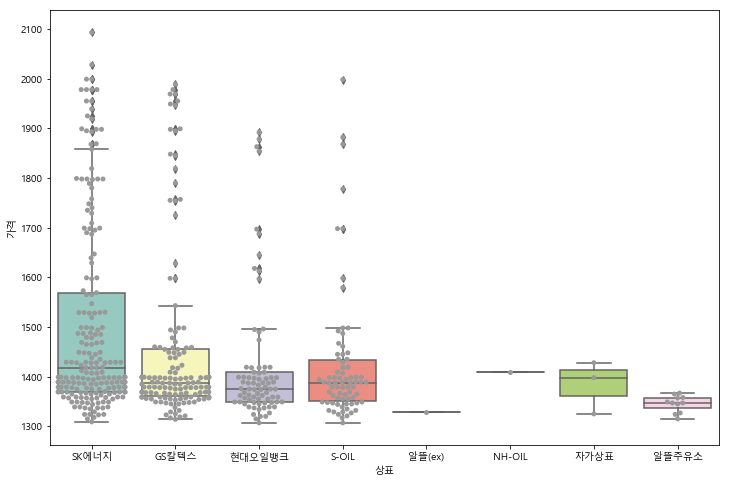

In [49]:
plt.figure(figsize=(12,8))
sns.boxplot(x='상표', y='가격', data=stations, palette='Set3')
sns.swarmplot(x='상표', y='가격', data=stations, color='.6')
plt.show()

- `swarmplot` : draw a scatter plot with non-overlapping points

In [50]:
stations['셀프'].value_counts()

N    321
Y    179
Name: 셀프, dtype: int64

In [51]:
from scipy.stats import ttest_ind

cat1 = stations[stations['셀프']=='Y']
cat2 = stations[stations['셀프']=='N']

ttest_ind(cat1['가격'], cat2['가격'])

Ttest_indResult(statistic=-9.048240661085286, pvalue=3.263851576282372e-18)

- T-test를 해본 결과 `셀프`인 주유소와 아닌 주유소 간에 휘발유 가격의 차이가 있다고 할 수 있다.

## 4-5 서울시 구별 주유 가격 확인하기

In [52]:
import json
import folium
import googlemaps
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [53]:
stations.sort_values(by='가격', ascending=False).head(10)

,Oil_store,주소,가격,셀프,상표,구
351,서남주유소,서울 중구 통일로 30 (봉래동1가),2093.0,N,SK에너지,중구
39,뉴서울(강남),서울 강남구 언주로 716 (논현동),2028.0,N,SK에너지,강남구
155,양재주유소,서울 서초구 바우뫼로 178 (양재동),1999.0,N,SK에너지,서초구
350,장충주유소,서울 중구 장충단로 202 (장충동1가),1999.0,N,SK에너지,중구
194,삼선주유소,서울 성북구 창경궁로 324,1998.0,N,S-OIL,성북구
349,필동주유소,서울특별시 중구 퇴계로 196 (필동2가),1989.0,N,GS칼텍스,중구
339,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),1978.0,N,GS칼텍스,종로구
312,한남지점,서울 용산구 한남대로21길 4 (한남동),1978.0,N,SK에너지,용산구
348,(주)중앙에너비스 퇴계로지점,서울 중구 퇴계로 228 (필동2가),1978.0,N,SK에너지,중구
313,에너비스,서울 용산구 한남대로 82 (한남동),1978.0,N,SK에너지,용산구


In [54]:
stations.sort_values(by='가격', ascending=True).head(10)

,Oil_store,주소,가격,셀프,상표,구
352,(주)자연에너지 대창주유소,서울 중랑구 동일로 636 (면목동),1307.0,N,현대오일뱅크,중랑구
353,에스오일(주) 구도일주유소 동천,서울특별시 중랑구 동일로 654 (면목동),1307.0,Y,S-OIL,중랑구
40,SK네트웍스(주)도봉행복주유소,서울 도봉구 도봉로 941 (도봉동),1309.0,Y,SK에너지,도봉구
367,수유동주유소,서울특별시 강북구 도봉로 395 (수유동),1314.0,Y,GS칼텍스,강북구
315,타이거주유소,서울 은평구 수색로 188 (증산동),1315.0,Y,SK에너지,은평구
314,(주)명연에너지 수색훼미리주유소,서울 은평구 수색로 236 (수색동),1315.0,Y,현대오일뱅크,은평구
173,원천주유소,서울특별시 성북구 돌곶이로 142 (장위동),1315.0,N,알뜰주유소,성북구
368,북서울고속주유소,서울특별시 강북구 삼양로 410 (수유동),1317.0,Y,S-OIL,강북구
174,강산주유소,서울 성북구 보문로 27 (보문동7가),1317.0,N,GS칼텍스,성북구
369,에덴주유소,서울 강북구 월계로 195 (번동),1318.0,Y,SK에너지,강북구


In [55]:
import numpy as np
gu_data = pd.pivot_table(stations, index=['구'], values=['가격'],
                        aggfunc=np.mean)
gu_data.sort_values(by='가격', ascending=False).head()

,가격
구,
중구,1867.500000
용산구,1802.200000
종로구,1734.444444
강남구,1612.700000
마포구,1587.818182


In [57]:
geo_path = 'C:/Users/jeong/Documents/JUPYTER NOTEBOOK/02. skorea_municipalities_geo_simple.json'
geo_data = json.load(open(geo_path, encoding = 'utf-8'))

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')
map.choropleth(geo_data = geo_data,
               data = gu_data,
               columns = [gu_data.index, '가격'],
               fill_color = 'Greens',
               key_on = 'feature.id')
map

## 4-6 서울시 주유 가격 상하위 10개 주유소 지도에 표기하기

In [58]:
oil_price_top10 = stations.sort_values(by = '가격', ascending = False).head(10)
oil_price_top10

,Oil_store,주소,가격,셀프,상표,구
351,서남주유소,서울 중구 통일로 30 (봉래동1가),2093.0,N,SK에너지,중구
39,뉴서울(강남),서울 강남구 언주로 716 (논현동),2028.0,N,SK에너지,강남구
155,양재주유소,서울 서초구 바우뫼로 178 (양재동),1999.0,N,SK에너지,서초구
350,장충주유소,서울 중구 장충단로 202 (장충동1가),1999.0,N,SK에너지,중구
194,삼선주유소,서울 성북구 창경궁로 324,1998.0,N,S-OIL,성북구
349,필동주유소,서울특별시 중구 퇴계로 196 (필동2가),1989.0,N,GS칼텍스,중구
339,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),1978.0,N,GS칼텍스,종로구
312,한남지점,서울 용산구 한남대로21길 4 (한남동),1978.0,N,SK에너지,용산구
348,(주)중앙에너비스 퇴계로지점,서울 중구 퇴계로 228 (필동2가),1978.0,N,SK에너지,중구
313,에너비스,서울 용산구 한남대로 82 (한남동),1978.0,N,SK에너지,용산구


In [59]:
oil_price_bottom10 = stations.sort_values(by = '가격', ascending = True).head(10)
oil_price_bottom10

,Oil_store,주소,가격,셀프,상표,구
352,(주)자연에너지 대창주유소,서울 중랑구 동일로 636 (면목동),1307.0,N,현대오일뱅크,중랑구
353,에스오일(주) 구도일주유소 동천,서울특별시 중랑구 동일로 654 (면목동),1307.0,Y,S-OIL,중랑구
40,SK네트웍스(주)도봉행복주유소,서울 도봉구 도봉로 941 (도봉동),1309.0,Y,SK에너지,도봉구
367,수유동주유소,서울특별시 강북구 도봉로 395 (수유동),1314.0,Y,GS칼텍스,강북구
315,타이거주유소,서울 은평구 수색로 188 (증산동),1315.0,Y,SK에너지,은평구
314,(주)명연에너지 수색훼미리주유소,서울 은평구 수색로 236 (수색동),1315.0,Y,현대오일뱅크,은평구
173,원천주유소,서울특별시 성북구 돌곶이로 142 (장위동),1315.0,N,알뜰주유소,성북구
368,북서울고속주유소,서울특별시 강북구 삼양로 410 (수유동),1317.0,Y,S-OIL,강북구
174,강산주유소,서울 성북구 보문로 27 (보문동7가),1317.0,N,GS칼텍스,성북구
369,에덴주유소,서울 강북구 월계로 195 (번동),1318.0,Y,SK에너지,강북구


In [60]:
gmap_key = *************
gmaps = googlemaps.Client(key = gmap_key)

In [61]:
from tqdm import tqdm_notebook

lat = []
lng = []

for n in tqdm_notebook(oil_price_top10.index) :
    try :
        tmp_add = str(oil_price_top10['주소'][n]).split('(')[0]
        tmp_map = gmaps.geocode(tmp_add)
        tmp_loc = tmp_map[0].get('geometry')
        lat.append(tmp_loc['location']['lat'])
        lng.append(tmp_loc['location']['lng'])
        
    except :
        lat.append(np.nan)
        lng.append(np.nan)
        print('Here is Nan!')
        
oil_price_top10['lat'] = lat
oil_price_top10['lng'] = lng
oil_price_top10

,Oil_store,주소,가격,셀프,상표,구,lat,lng
351,서남주유소,서울 중구 통일로 30 (봉래동1가),2093.0,N,SK에너지,중구,37.558348,126.972090
39,뉴서울(강남),서울 강남구 언주로 716 (논현동),2028.0,N,SK에너지,강남구,37.517636,127.035756
155,양재주유소,서울 서초구 바우뫼로 178 (양재동),1999.0,N,SK에너지,서초구,37.478071,127.039610
350,장충주유소,서울 중구 장충단로 202 (장충동1가),1999.0,N,SK에너지,중구,37.562719,127.007010
194,삼선주유소,서울 성북구 창경궁로 324,1998.0,N,S-OIL,성북구,37.587908,127.005575
349,필동주유소,서울특별시 중구 퇴계로 196 (필동2가),1989.0,N,GS칼텍스,중구,37.560850,126.993653
339,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),1978.0,N,GS칼텍스,종로구,37.574464,126.966618
312,한남지점,서울 용산구 한남대로21길 4 (한남동),1978.0,N,SK에너지,용산구,37.534657,127.006063
348,(주)중앙에너비스 퇴계로지점,서울 중구 퇴계로 228 (필동2가),1978.0,N,SK에너지,중구,37.561648,126.997142
313,에너비스,서울 용산구 한남대로 82 (한남동),1978.0,N,SK에너지,용산구,37.535952,127.006130


In [62]:
lat = []
lng = []

for n in tqdm_notebook(oil_price_bottom10.index) :
    try :
        tmp_add = str(oil_price_bottom10['주소'][n]).split('(')[0]
        tmp_map = gmaps.geocode(tmp_add)
        tmp_loc = tmp_map[0].get('geometry')
        lat.append(tmp_loc['location']['lat'])
        lng.append(tmp_loc['location']['lng'])
        
    except :
        lat.append(np.nan)
        lng.append(np.nan)
        print('Here is Nan!')
        
oil_price_bottom10['lat'] = lat
oil_price_bottom10['lng'] = lng
oil_price_bottom10

,Oil_store,주소,가격,셀프,상표,구,lat,lng
352,(주)자연에너지 대창주유소,서울 중랑구 동일로 636 (면목동),1307.0,N,현대오일뱅크,중랑구,37.587170,127.080217
353,에스오일(주) 구도일주유소 동천,서울특별시 중랑구 동일로 654 (면목동),1307.0,Y,S-OIL,중랑구,37.588868,127.080235
40,SK네트웍스(주)도봉행복주유소,서울 도봉구 도봉로 941 (도봉동),1309.0,Y,SK에너지,도봉구,37.688335,127.045313
367,수유동주유소,서울특별시 강북구 도봉로 395 (수유동),1314.0,Y,GS칼텍스,강북구,37.642140,127.029568
315,타이거주유소,서울 은평구 수색로 188 (증산동),1315.0,Y,SK에너지,은평구,37.578424,126.902050
314,(주)명연에너지 수색훼미리주유소,서울 은평구 수색로 236 (수색동),1315.0,Y,현대오일뱅크,은평구,37.581122,126.897774
173,원천주유소,서울특별시 성북구 돌곶이로 142 (장위동),1315.0,N,알뜰주유소,성북구,37.614921,127.052752
368,북서울고속주유소,서울특별시 강북구 삼양로 410 (수유동),1317.0,Y,S-OIL,강북구,37.640155,127.017203
174,강산주유소,서울 성북구 보문로 27 (보문동7가),1317.0,N,GS칼텍스,성북구,37.586954,127.017600
369,에덴주유소,서울 강북구 월계로 195 (번동),1318.0,Y,SK에너지,강북구,37.621668,127.045522


In [63]:
map = folium.Map(location = [37.5502,126.982], zoom_start = 11)

for n in oil_price_top10.index :
    if pd.notnull(oil_price_top10['lat'][n]) :
        folium.CircleMarker([oil_price_top10['lat'][n], oil_price_top10['lng'][n]],
                            radius = 15, color = '#ff661a',
                            fill_color = '#ff661a',
                            popup = oil_price_top10['상표'][n]).add_to(map)
for n in oil_price_bottom10.index :
    if pd.notnull(oil_price_bottom10['lat'][n]) :
        folium.CircleMarker([oil_price_bottom10['lat'][n], oil_price_bottom10['lng'][n]],
                            radius = 15, color = '#4dc3ff',
                            fill_color = '#4dc3ff',
                            popup = oil_price_bottom10['상표'][n]).add_to(map)
map